In [1]:
#@title
from IPython.core.display import display, HTML
display(HTML('<h3 style="text-align: center;font-weight: normal;">========  COVID-19 Statistics Analysis  ==========</h3><p style="text-align: left;font-weight: normal;"> <strong>- COVID-19 infection/Deaths Percentile per category relation(Gender,Age, and relation when having other diseases)  </strong> </p>'))

In [ ]:
#@title
!git clone https://github.com/fadimasoud/C3.Grand_challeng.git

In [ ]:
#@title
cd /content/C3.Grand_challeng

In [ ]:
#@title
!unzip \*.zip  && rm *.zip

<IPython.core.display.Javascript object>

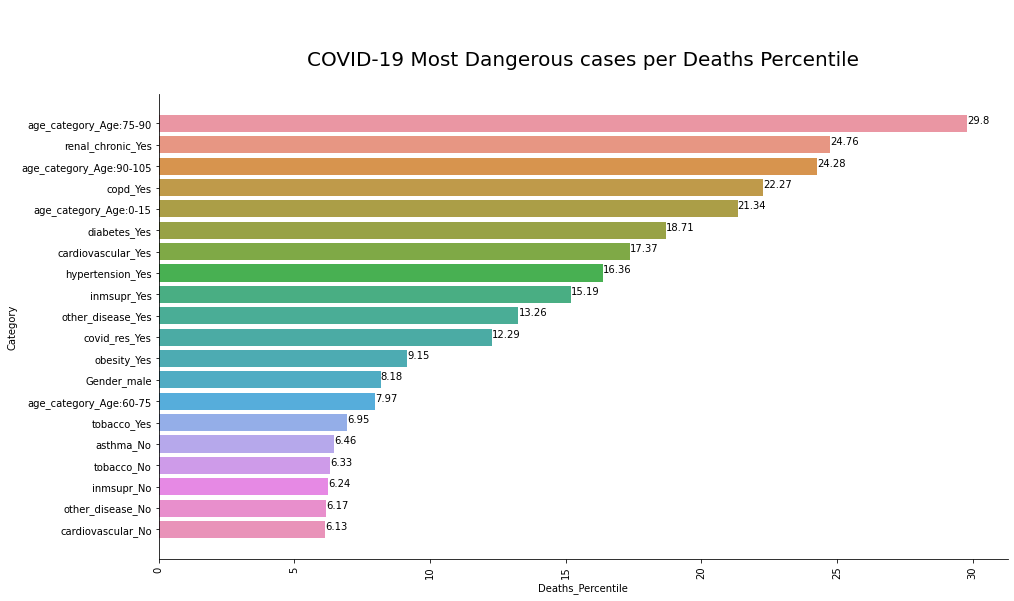

In [6]:
#@title
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from IPython.core.display import display, HTML
import time
import datetime
from matplotlib.ticker import PercentFormatter
from IPython.display import Javascript


#-=-=-=-=-=-=-=-=-=

data_det2 = pd.read_csv('/content/C3.Grand_challeng/covid.csv')

# prepare data
data_d = data_det2.copy()
data_d['Gender'] = data_d['sex'].replace({1:'female',2:'male'})
# columns with a huge amount of unkown values or unclear
data_d.drop(columns=['patient_type','intubed','pneumonia','sex','pregnancy','contact_other_covid','icu'],inplace=True)
death = []
for x in data_d['date_died']:
    if (x=='9999-99-99'):
        death.append(0)
    else:
        death.append(1)
data_d['death']=death
data_d['age_category'] = pd.cut(data_d['age'], 8,labels=['Age:30-45','Age:45-60','Age:15-30','Age:60-75','Age:0-15','Age:75-90','Age:90-105','Age:105-120'])

corr = {1:'Yes',2:'No',98:'No',97:'No',99:'No',3:'No'}
# data_d['diabetes'].replace(corr,inplace=True) #.columns
data_d.columns
for x in ['diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'covid_res']:
    data_d[x].replace(corr,inplace=True)

#@title
# print('Below Suumary Deaths Percentile per category results are based on covid19-patient-precondition-dataset which was released by the Mexican government. It include 566602 entries which is a huge number of anonymised patient and should be a high accurate result')
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
SumDdf = pd.DataFrame(columns=['Category','Deaths_Percentile'])
for x in ['Gender','age_category','diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'covid_res']:
    
    death_percentile = round((len(data_d[x][data_d['death']==1])*100)/len(data_d[x]),2)
    
    t_df = data_d[x].value_counts().reset_index()
    t_d_df = data_d[x][data_d['death']==1].value_counts().reset_index()
    
    for i, idx in enumerate(data_d[x].value_counts().reset_index()['index']):
        SumDdf = SumDdf.append({'Category':'%s_%s'%(x,idx),
                       'Deaths_Percentile':round((np.array(t_d_df[x][t_d_df['index']==idx])[0]*100)/np.array(t_df[x][t_df['index']==idx])[0],2)},
                     ignore_index=True)
        
sns.catplot(data=SumDdf.sort_values(by='Deaths_Percentile',ascending=False)[0:20],x='Deaths_Percentile',y='Category',kind='bar',height=7,aspect=2)
plt.xticks(rotation=90)
plt.title('\n\nCOVID-19 Most Dangerous cases per Deaths Percentile\n',fontsize=20)
plt.xlabel('Deaths_Percentile')
for i, x in enumerate(SumDdf.sort_values(by='Deaths_Percentile',ascending=False)['Deaths_Percentile'][0:20]):
    plt.text(x,i,x)
plt.autoscale()    
plt.show()

# SumDdf.sort_values(by='Deaths_Percentile',ascending=False)


<IPython.core.display.Javascript object>

Below detailed Deaths Percentile per category results are based on covid19-patient-precondition-dataset which was
 released by the Mexican government. It include 566602 entries which is a huge number of anonymised patient and high accurate result


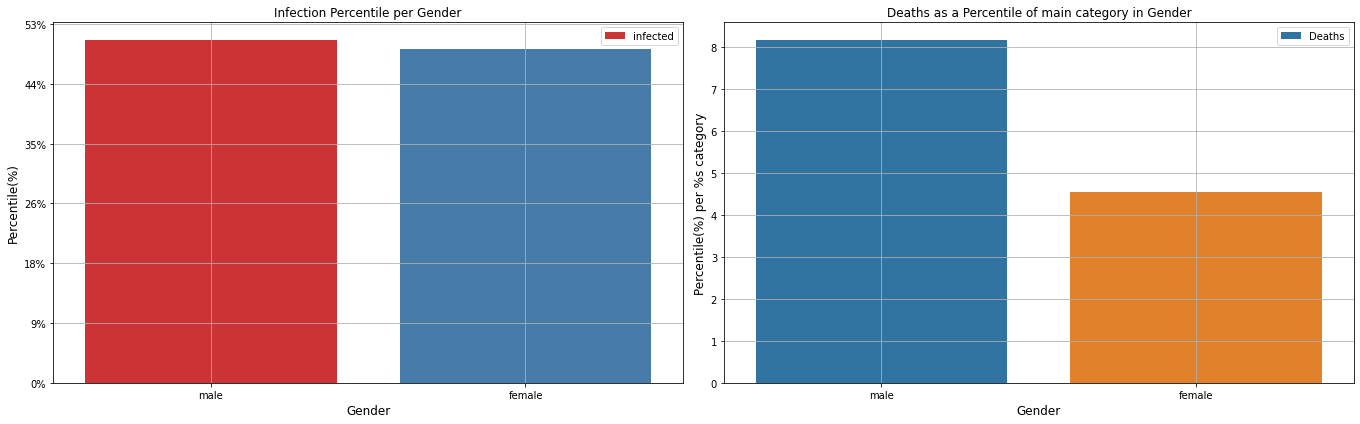

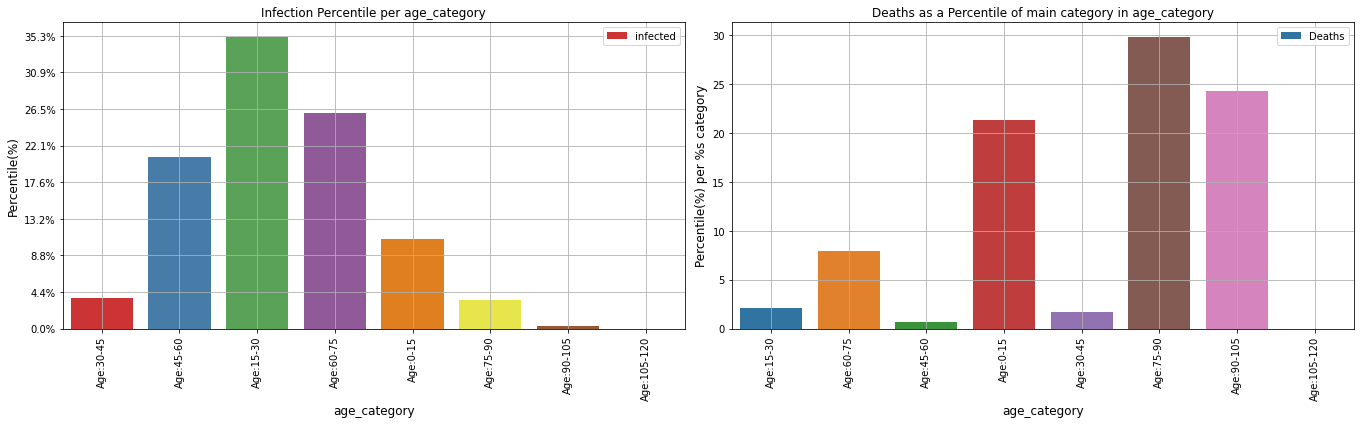

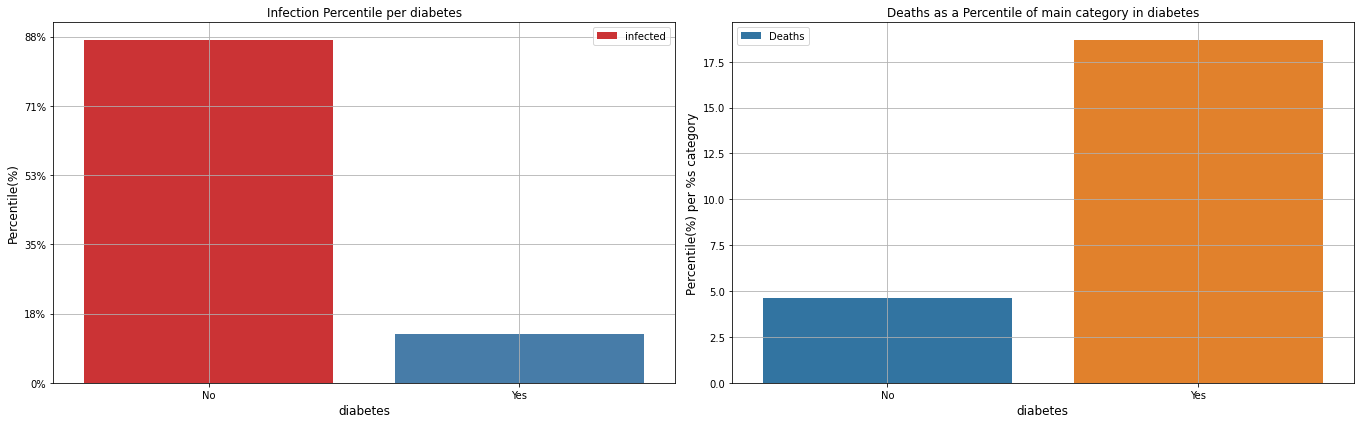

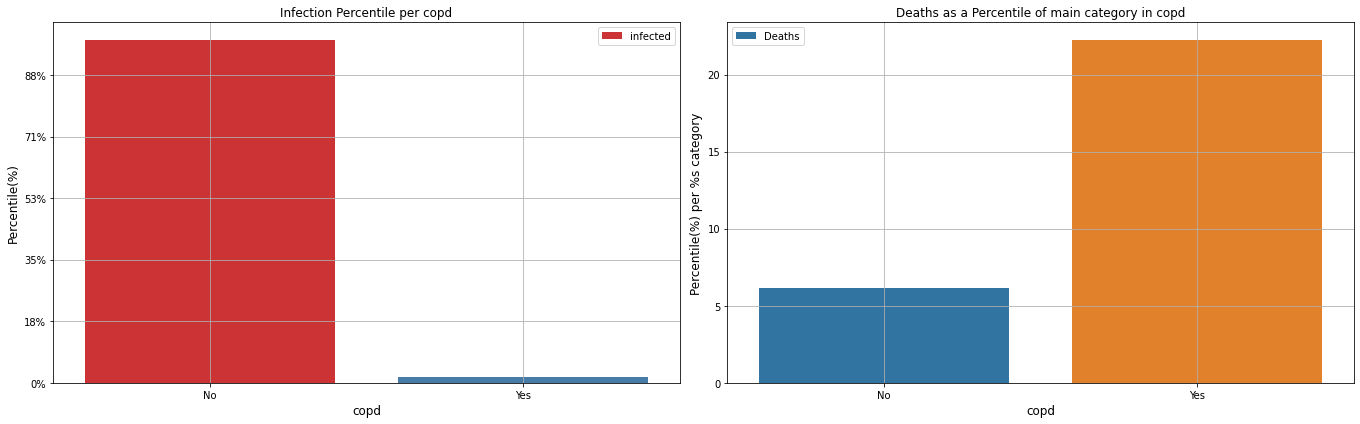

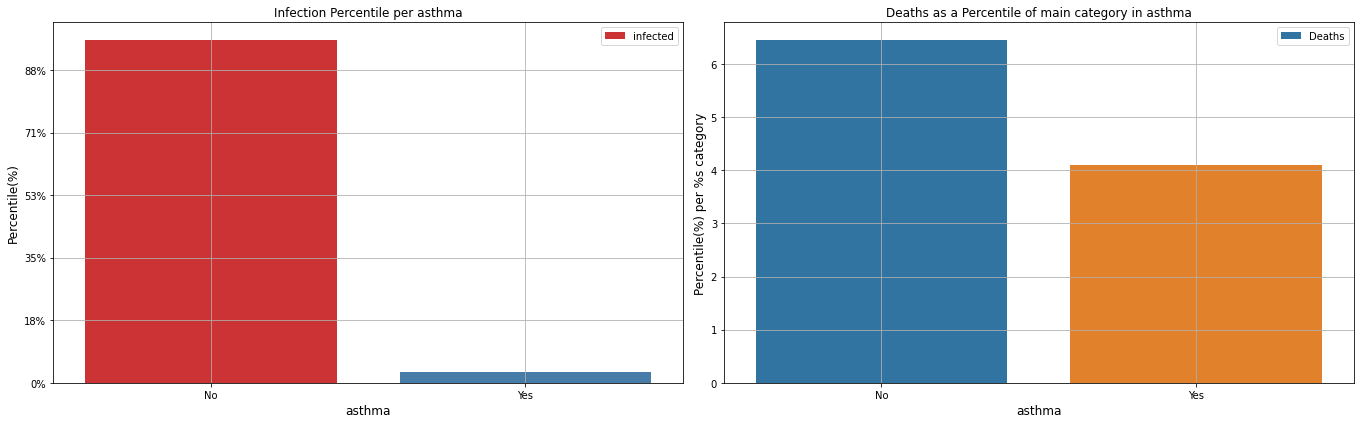

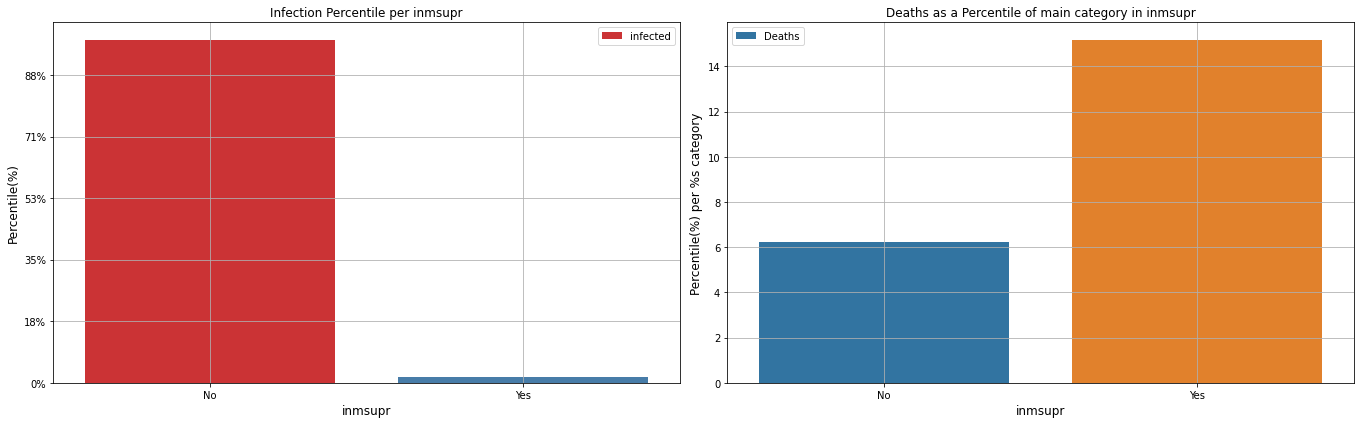

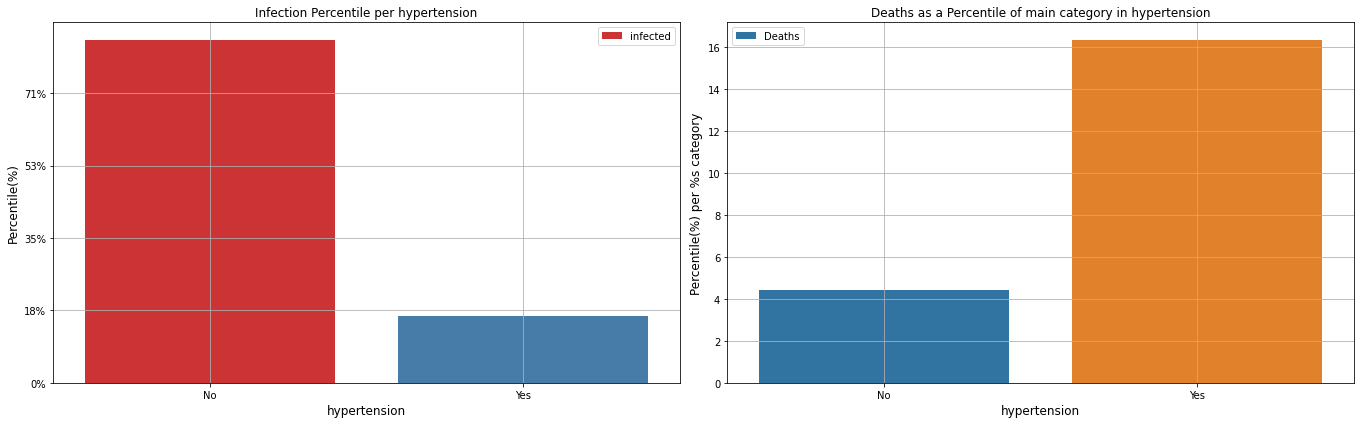

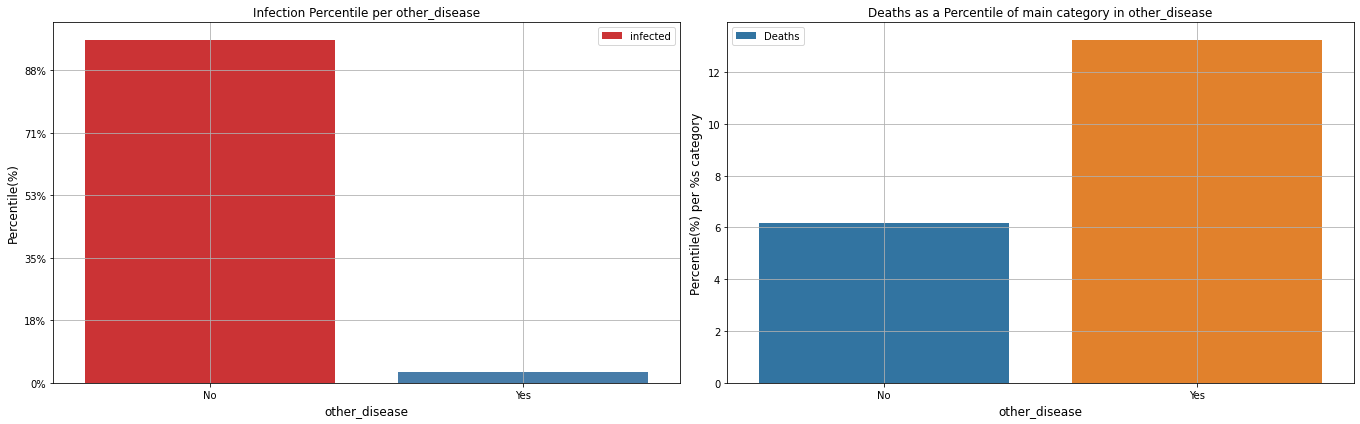

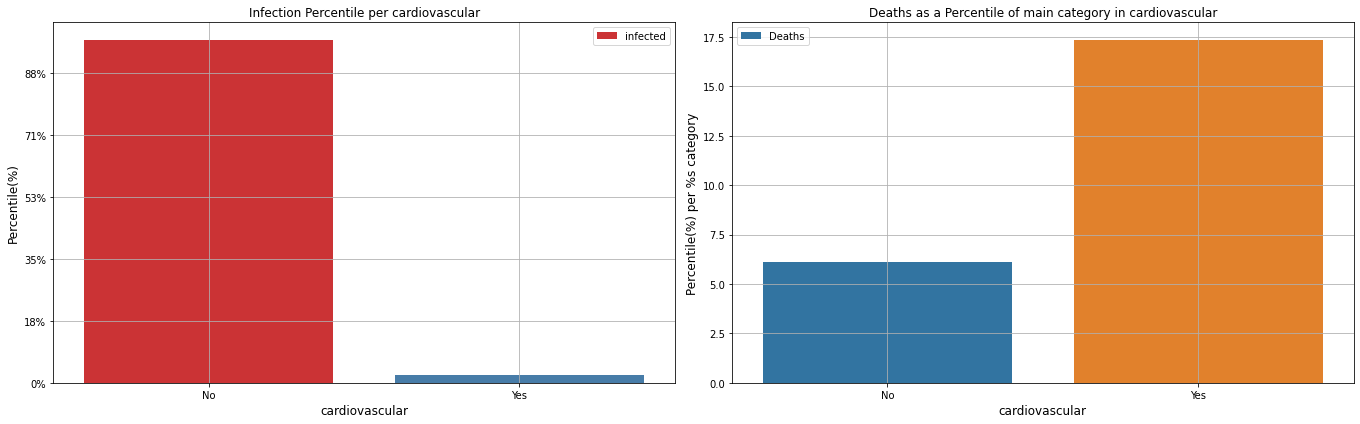

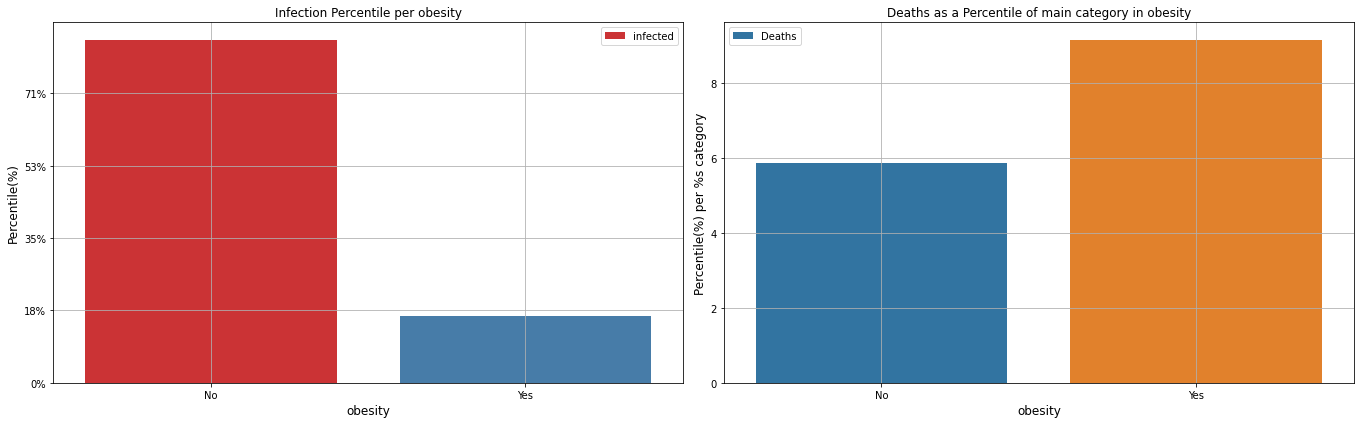

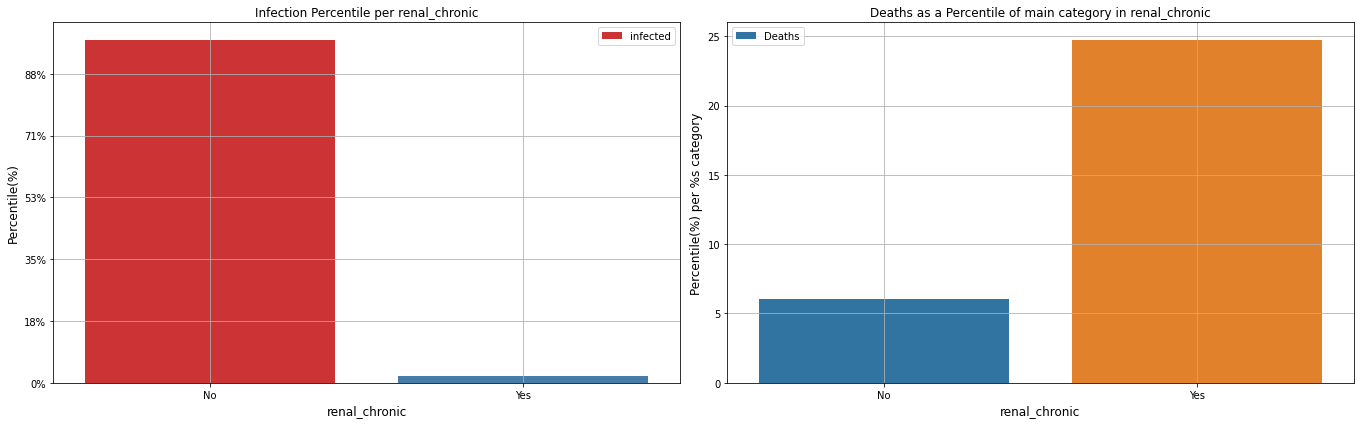

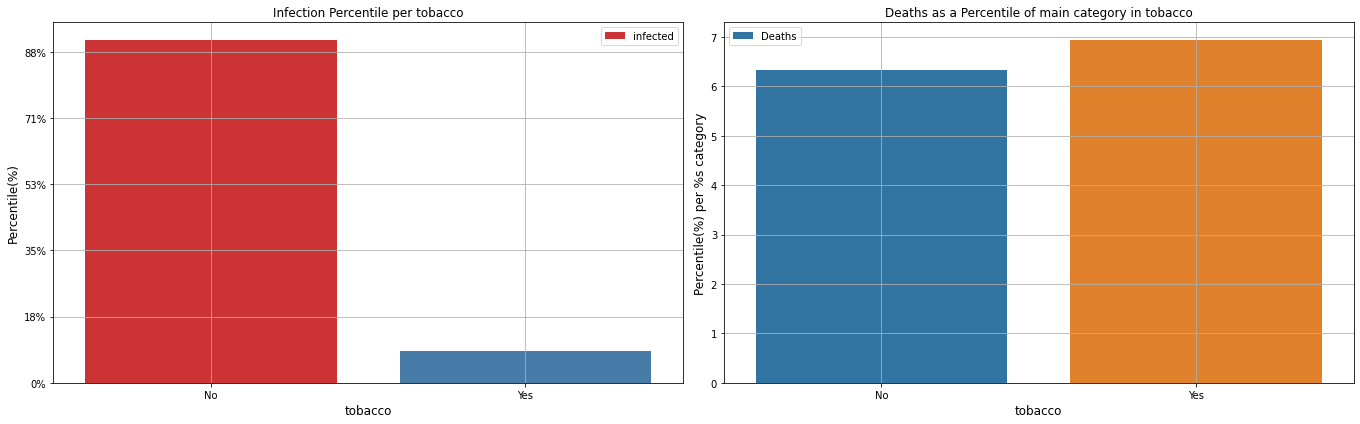

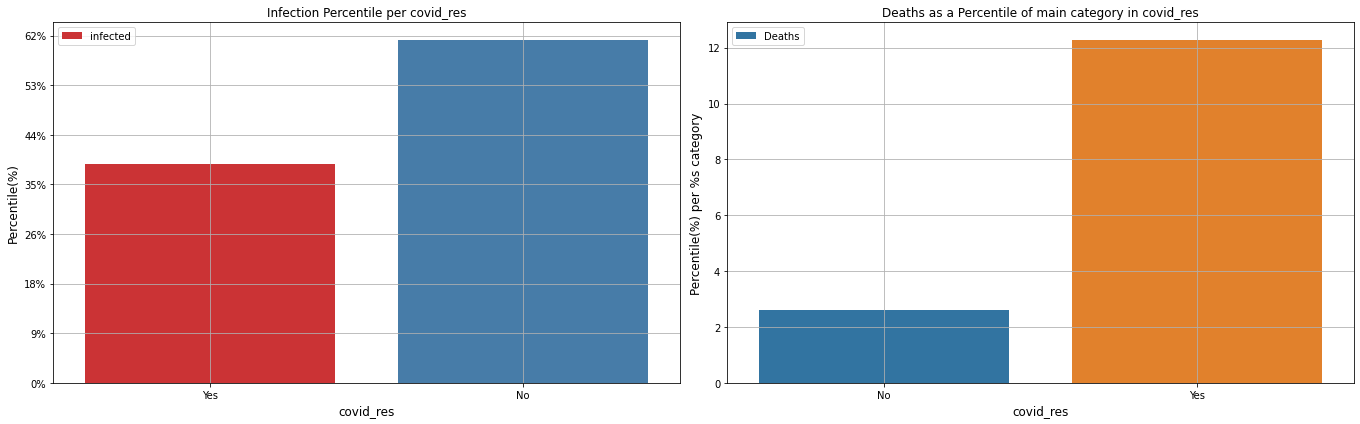

In [18]:
#@title

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 50000})'''))
print('Below detailed Deaths Percentile per category results are based on covid19-patient-precondition-dataset which was\n released by the Mexican government. It include 566602 entries which is a huge number of anonymised patient and high accurate result')

SumDdf = pd.DataFrame(columns=['Category','Deaths_Percentile'])
for x in ['Gender','age_category','diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'covid_res']:
    
    death_percentile = round((len(data_d[x][data_d['death']==1])*100)/len(data_d[x]),2)
    
    t_df = data_d[x].value_counts().reset_index()
    t_d_df = data_d[x][data_d['death']==1].value_counts().reset_index()
    values_stat = []
    death_values_stat = []
    df_stat = []
    df_death_stat = []
    
    for i, idx in enumerate(data_d[x].value_counts().reset_index()['index']):
        values_stat.append('| __ |  %s : %s or %s%%   | __ |'%(idx,np.array(t_df[x][t_df['index']==idx])[0],round((np.array(t_df[x][t_df['index']==idx])[0]*100)/t_df[x].sum(),2)))
        death_values_stat.append('| __ |  %s : %s or %s%%   | __ |'%(idx,np.array(t_d_df[x][t_d_df['index']==idx])[0],round((np.array(t_d_df[x][t_d_df['index']==idx])[0]*100)/np.array(t_df[x][t_df['index']==idx])[0],2)))
        df_stat.append(idx)
        df_death_stat.append(round((np.array(t_d_df[x][t_d_df['index']==idx])[0]*100)/np.array(t_df[x][t_df['index']==idx])[0],2))
        SumDdf = SumDdf.append({'Category':'%s_%s'%(x,idx),
                       'Deaths_Percentile':round((np.array(t_d_df[x][t_d_df['index']==idx])[0]*100)/np.array(t_df[x][t_df['index']==idx])[0],2)},
                     ignore_index=True)
        
    tempdf = pd.DataFrame(columns=['cat','val'])
    tempdf['cat']=df_stat
    tempdf['val']=df_death_stat
    
    plt.figure(figsize=(19,6))
    # plt.subplots_adjust(hspace = 20)
    plt.subplot(1, 2, 1)
    ax = sns.countplot(data_d[x], palette="Set1",label='infected')
    display(HTML('<h3 style="text-align: center;font-weight: normal;"> Infection & Deaths per <strong> %s </strong>  Statistics Count </h3><br><h5 style="text-align: center;font-weight: normal;"><strong>Infection values count per %s are: <br> %s <br><br>Deaths values count per %s are: <br> %s <br><br> %s Death percentile: %s</strong></h5>'%(x,x,values_stat,x,death_values_stat,x,death_percentile)))
    plt.legend()
    if x == 'age_category':
        plt.xticks(rotation=90)
    plt.grid(True)
    plt.title('Infection Percentile per %s'%x)
    plt.xlabel(x,fontsize=12)
    plt.ylabel('Percentile(%)',fontsize=12)
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=len(data_d[x])))
    plt.tight_layout()
    plt.subplot(1, 2, 2)
    ax = sns.barplot(data=tempdf,
                         x='cat',
                         y='val',
                        label='Deaths')
#     tempdf.plot(x='cat',y='val',label='Death',kind='bar',color=['r','b'])
    if x == 'age_category':
        plt.xticks(rotation=90)
    plt.title('Deaths as a Percentile of main category in %s'%x)
    plt.xlabel(x,fontsize=12)
    plt.ylabel('Percentile(%) per %s category',fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
#     ax.yaxis.set_major_formatter(PercentFormatter(xmax=len(data_d[x])))
    plt.show()

In [7]:
#@title
